Import libraries

In [1]:
import pandas as pd


load the data of the csv file

In [2]:
df_task2 = pd.read_csv('/content/sample_data/Au_nanoparticle_dataset.csv', encoding='latin')

In [3]:
print(df_task2.head())

   ID    T       tau  time  N_total  N_bulk  N_surface        Volume    R_min  \
0   1  273  0.000025     1     1599    1014        585  2.710000e-26  15.5898   
1   2  273  0.000025     2     1642    1034        608  2.780000e-26  15.3996   
2   3  273  0.000025     3     4637    3365       1272  7.850000e-26  21.9199   
3   4  273  0.000025     4     7189    5292       1897  1.220000e-25  23.2542   
4   5  273  0.000025     5    11004    8508       2496  1.860000e-25  27.1200   

     R_max  ...  q6q6_S14  q6q6_S15  q6q6_S16  q6q6_S17  q6q6_S18  q6q6_S19  \
0  19.4516  ...         0         0         0         0         0         0   
1  24.1755  ...         0         0         0         0         0         0   
2  31.0305  ...         0         0         0         0         0         0   
3  37.8795  ...         0         0         0         0         0         0   
4  39.7614  ...         0         0         0         0         0         0   

   q6q6_S20  q6q6_S20+     Total_E  Fo

In [4]:
print(df_task2.columns)

Index(['ID', 'T', 'tau', 'time', 'N_total', 'N_bulk', 'N_surface', 'Volume',
       'R_min', 'R_max',
       ...
       'q6q6_S14', 'q6q6_S15', 'q6q6_S16', 'q6q6_S17', 'q6q6_S18', 'q6q6_S19',
       'q6q6_S20', 'q6q6_S20+', 'Total_E', 'Formation_E'],
      dtype='object', length=185)


Check for missing values

In [5]:
missing_data = df_task2.isnull().sum()
print(missing_data)

ID             0
T              0
tau            0
time           0
N_total        0
              ..
q6q6_S19       0
q6q6_S20       0
q6q6_S20+      0
Total_E        0
Formation_E    1
Length: 185, dtype: int64


Fill the missing value

In [6]:
df_task2['Formation_E'] = df_task2['Formation_E'].fillna(0)

In [7]:
print(df_task2.isnull().sum())

ID             0
T              0
tau            0
time           0
N_total        0
              ..
q6q6_S19       0
q6q6_S20       0
q6q6_S20+      0
Total_E        0
Formation_E    0
Length: 185, dtype: int64


In [8]:
df_filtered = df_task2.drop(['N_total', 'N_bulk', 'N_surface', 'R_avg'], axis=1)

In [9]:
print(df_filtered.head(20))

    ID    T       tau  time        Volume    R_min    R_max   R_diff   R_std  \
0    1  273  0.000025     1  2.710000e-26  15.5898  19.4516   3.8618  0.6230   
1    2  273  0.000025     2  2.780000e-26  15.3996  24.1755   8.7760  0.9295   
2    3  273  0.000025     3  7.850000e-26  21.9199  31.0305   9.1106  1.0701   
3    4  273  0.000025     4  1.220000e-25  23.2542  37.8795  14.6253  2.3732   
4    5  273  0.000025     5  1.860000e-25  27.1200  39.7614  12.6415  1.9397   
5    6  273  0.000025     6  2.260000e-25  33.2496  42.9612   9.7116  1.0219   
6    7  273  0.000025     7  2.340000e-25  33.6164  41.6168   8.0004  0.8979   
7    8  273  0.000025     8  2.360000e-25  34.5185  41.4386   6.9201  0.8595   
8    9  273  0.000025     9  2.370000e-25  34.7525  41.5998   6.8473  0.8483   
9   10  273  0.000025    10  2.380000e-25  34.7870  41.5401   6.7531  0.8308   
10  11  273  0.000050     1  2.600000e-26  15.0408  18.6580   3.6172  0.6360   
11  12  273  0.000050     2  2.640000e-2

Calculate the mean, standard deviation and quartile values

In [10]:
statistics = df_task2[['N_total', 'N_bulk', 'N_surface', 'R_avg']].describe()

In [11]:
print(statistics)

            N_total        N_bulk   N_surface        R_avg
count   4000.000000   4000.000000  4000.00000  4000.000000
mean    3476.786500   2521.550250   955.23625    20.654363
std     3679.286769   2976.232459   721.87022     7.610716
min      236.000000     89.000000   137.00000     8.528600
25%     1061.000000    618.750000   437.00000    15.160725
50%     1867.000000   1199.000000   666.00000    18.629250
75%     4503.000000   3183.000000  1301.75000    25.525125
max    14277.000000  11580.000000  3190.00000    39.239200


Plot the histogram

In [12]:
import matplotlib.pyplot as plt

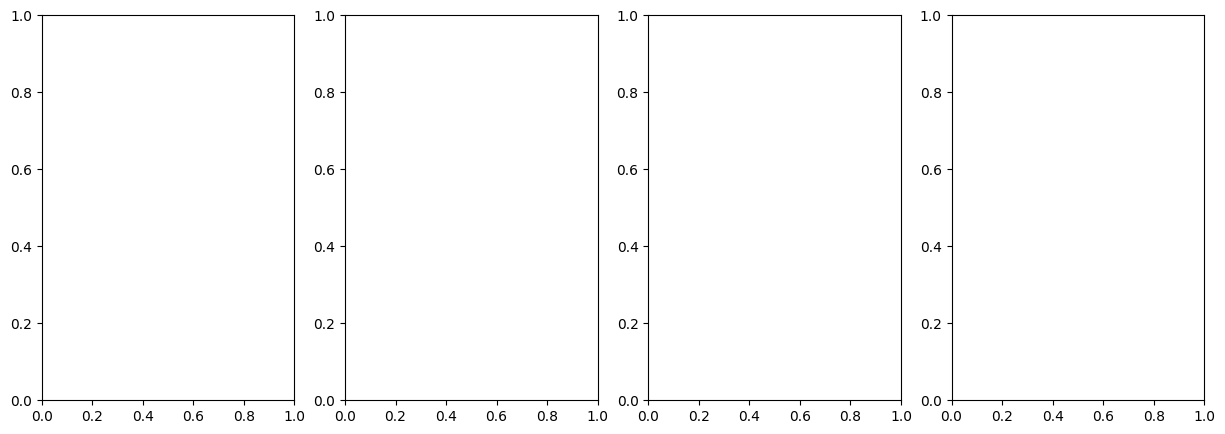

In [13]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

In [14]:
features = ['N_total', 'N_bulk', 'N_surface', 'R_avg']

In [15]:
for i, feature in enumerate(features):
    axes[i].hist(df_task2[feature], bins=30, color='blue', edgecolor='black')
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

In [16]:
plt.show()

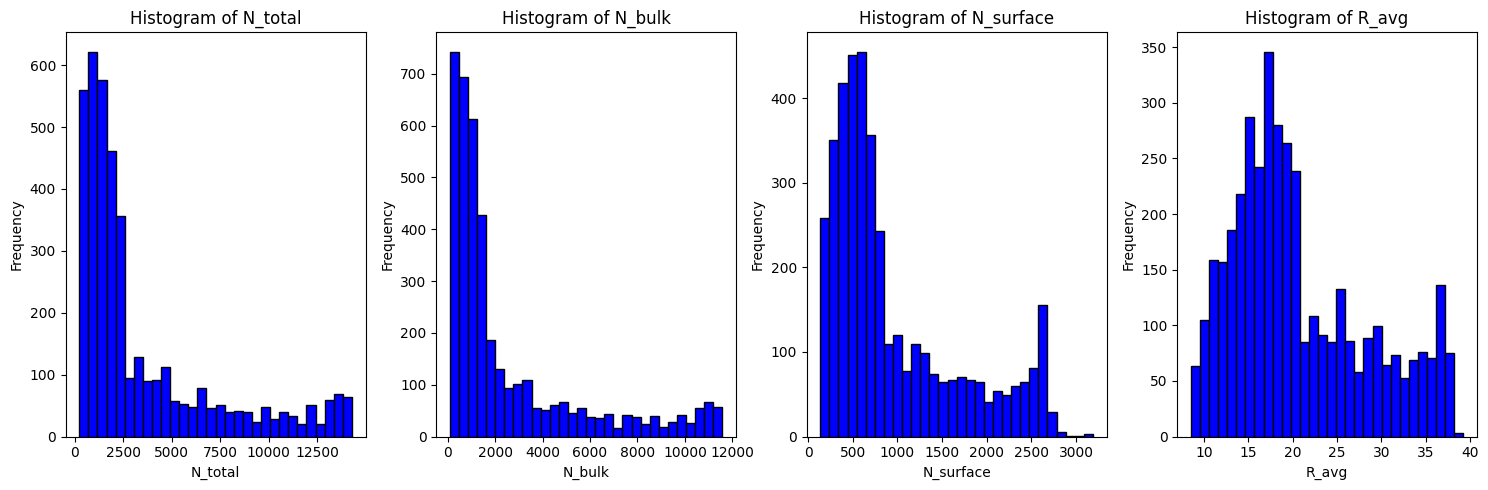

In [17]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

features = ['N_total', 'N_bulk', 'N_surface', 'R_avg']

for i, feature in enumerate(features):
    axes[i].hist(df_task2[feature], bins=30, color='blue', edgecolor='black')
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [18]:
import seaborn as sns
import pandas as pd

In [19]:
df_task2 = pd.read_csv('/content/sample_data/Au_nanoparticle_dataset.csv', encoding='latin')

In [20]:
df_filtered = df_task2.drop(['N_total', 'N_bulk', 'N_surface', 'R_avg'], axis=1)

In [21]:
print(df_filtered.head())

   ID    T       tau  time        Volume    R_min    R_max   R_diff   R_std  \
0   1  273  0.000025     1  2.710000e-26  15.5898  19.4516   3.8618  0.6230   
1   2  273  0.000025     2  2.780000e-26  15.3996  24.1755   8.7760  0.9295   
2   3  273  0.000025     3  7.850000e-26  21.9199  31.0305   9.1106  1.0701   
3   4  273  0.000025     4  1.220000e-25  23.2542  37.8795  14.6253  2.3732   
4   5  273  0.000025     5  1.860000e-25  27.1200  39.7614  12.6415  1.9397   

   R_skew  ...  q6q6_S14  q6q6_S15  q6q6_S16  q6q6_S17  q6q6_S18  q6q6_S19  \
0 -0.0435  ...         0         0         0         0         0         0   
1  2.0673  ...         0         0         0         0         0         0   
2  0.3618  ...         0         0         0         0         0         0   
3  0.1431  ...         0         0         0         0         0         0   
4 -0.3849  ...         0         0         0         0         0         0   

   q6q6_S20  q6q6_S20+     Total_E  Formation_E  
0     

In [ ]:
sns.pairplot(df_filtered)
plt.show()